Accepted: 47.3 %


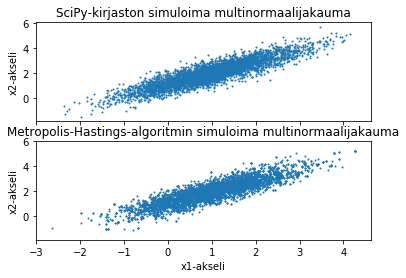

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mv_normal
from numpy.random import RandomState

def metropolis_hastings(uniform_rng, chain_start, n, logtarget, candidate_generating_density):
    x = chain_start
    chain = np.zeros(2 * n).reshape(2,n,1)
    accepted = 0
    
    for i in range(n):
        candidate = candidate_generating_density(x)
        if np.log(uniform_rng.uniform()) < logtarget(candidate) - logtarget(x):
            x = candidate
            accepted += 1
        
        chain[:,i,:] = x
        
    print(f"Accepted: {(accepted/n)*100:.1f} %")
    return chain

uniform_rng = RandomState(1729)
proposal_rng = RandomState(2)
mu = np.array([[1], [2]])
sigma = np.array([[1, 0.9], [0.9, 1]])
sigma_inverse = np.linalg.inv(sigma)

# Multinormaalijakauman tiheysfunktion logaritmi ilman normalisointivakioita
logtarget = lambda x: -0.5 * np.transpose(x - mu) @ sigma_inverse @ (x - mu)
# Autoregressive generating density
proposal_density = lambda x: mu - (x - mu) + proposal_rng.uniform(low=-1, high=1, size=2).reshape(2,1)

chain = metropolis_hastings(uniform_rng, 
                            np.array([[1.0], [2.0]]), 
                            12000, 
                            logtarget, 
                            proposal_density)
without_burn_in = chain[:, chain.shape[1] // 2:, :]
scipy_mnormal = mv_normal.rvs(mean=mu.reshape(2,),
                              cov=sigma, 
                              size=4000, 
                              random_state=RandomState(99)).T

fig, ax = plt.subplots(2,1, sharex=True, sharey=True)
ax[0].scatter(scipy_mnormal[0], scipy_mnormal[1], s=1)
ax[0].set_title("SciPy-kirjaston simuloima multinormaalijakauma")
ax[1].scatter(without_burn_in[0,:,:], without_burn_in[1,:,:], s=1)
ax[1].set_title("Metropolis-Hastings-algoritmin simuloima multinormaalijakauma")

for axis in ax.flat:
    axis.set(xlabel='x1-akseli', ylabel='x2-akseli')
    axis.label_outer()
    
plt.show()